## Imports

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import svm, datasets, neighbors
from sklearn import svm, datasets, neighbors

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from collections import Counter

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.ensemble import VotingClassifier
import random
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

import warnings
warnings.filterwarnings("ignore")


## Data

In [19]:
data = datasets.load_diabetes(scaled=False)
feature_names = data.feature_names
x = data.data

#we are going to have data presplit so
xtrain,xtest = train_test_split(x,train_size = .80)
#xtest


train_df = pd.read_csv('rice_train.csv')


xtrain = train_df[['Area', 'Perimeter', 'Major_Axis_Length', \
 'Minor_Axis_Length','Eccentricity', 'Convex_Area', 'Extent']]
xtrain.head(2)

ytrain = train_df['Class']
encoder = LabelEncoder()
ytrain = encoder.fit_transform(ytrain)
#now encoded
ytrain



xtest = train_df[['Area', 'Perimeter', 'Major_Axis_Length', \
 'Minor_Axis_Length','Eccentricity', 'Convex_Area', 'Extent']]

ytest = train_df['Class']
ytest = encoder.fit_transform(ytest)

# 0: Preprocessing the Data 


In [2]:
def label_encode(data):
    
    """
    NOTE: use .dropna() to remove missing values
    
    Takes in a datarframe and converts all data columns that are of
    object data type into numerical feilds
    """
    
    encoder = LabelEncoder()
    # columns that are categorical/of object data type
    cols = data.select_dtypes(include='O').columns
    

    for col in cols:
        # Label encoding each column and overwritting it
        data[col] = encoder.fit_transform(data[col])
        
        
    return data

In [ ]:
#the cleaning has to be done on both the train and test portions

data = train_data

train_data = label_encode(data)
test_data = label_encode(data)

# Splitting the Data (train and test folds)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.2)

# 1: Plotting the Data


#### PCA Plot
Scatterplot of train data, 2 components, colored according to associated classes

In [39]:
def pca(xtrain,ytrain):
    """
    PCA train data inorder to scatterplot data against 2 components
    data is colored according to the true classes
    
    PURPOSE: is the data well seperable for a classification task?
    """
    #preprocessesing
    scaler = StandardScaler()
    
    #scale the train data
    xtrain = scaler.fit_transform(xtrain)
    
    #instance of PCA specifying 2 components
    pca = PCA(n_components=2)
    pca.fit(xtrain)
    #the train data is now defined by 2 principle components
    pca_x = pca.transform(xtrain)
    
    #the unique classes in y
    classes = np.unique(ytrain)
    
    #iterate through each unique class
    for i in range(len(classes)):
        #scatter the pca data for both components, with different colors per class
        plt.scatter(pca_x[ytrain==i,0], pca_x[ytrain==i,1], label = classes[i])
        
    
    plt.title('Scatterplot of Data Colored According to Classes')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    

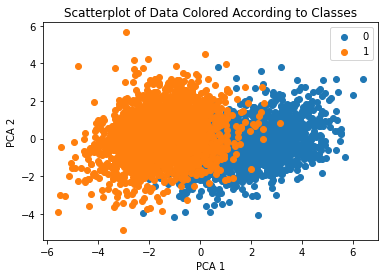

In [40]:
xtrain = xtrain 
ytrain = ytrain


pca(xtrain,ytrain)

#### General PCA (scatters the 2 pca components against each other)

- will pca the x data (can intake xtest/xtrain as seperate folds)
- this data can be returned and used in an algorithm
- or simply use for plotting purposes (identify trends (clusters in the data) identify features which are most important)


In [27]:
def pca(x, feature_names):
    
    """
    Optionally returns pca_x
    ~ if pca is applied to reduce dimensionality~
    
    """
    
    #preprocessing
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    #create the instance, specifying the number of components
    pca = decomposition.PCA(n_components=2)
    
    #learn the patterns in x, extract most important information
    pca.fit(x)
    x_pca = pca.transform(x)
    
    #we still preserve the same number of rows, just reduced the number of columns
    print(f'Shape of Original Data (r,c): {x.shape}')
    print(f'Shape of PCA Data (r,c): {x_pca.shape}')
    
    
    #weights are mulitplied by associated data points to reduce dimensioality
    #each pca results in ONE value
    print('\n--- FEATURE IMPORTANCE ---')
    weights = pca.components_ 
    #WHAT ARE THE MOST IMPORTANT FEATURES???? (largest magnitude in the first component)
    print(f'Weights on PC1:\n{pca.components_[0]}')
    print(f'Weights on PC2:\n{pca.components_[1]}')
    

    #scatter the first component against the second component
    #PURPOSE: assess clusters/trends in the data -- a visual assessment of the data
    plt.scatter(x_pca[:,0],x_pca[:,1])
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title('Distribution of Data Across the 2 Components')

    plt.figure(2)
    xlabels = feature_names
    #xlabels names of all the columns exsistent in the original data
    for i in range(len(xlabels)):
        #x: the weights for the first component for column i
        #y: the weights on the second component for column i
        #data points are colored according to the columun they are associated with
        plt.scatter(weights[0,i], weights[1,i], label = xlabels[i])

    plt.xlabel('Feature Importance for PCA1')
    plt.ylabel('Feature Importance for PCA2')
    plt.title('Feature Importance')
    plt.legend()
    
    #you can optionally return pca_x
    #return pca_x


Shape of Original Data (r,c): (353, 10)
Shape of PCA Data (r,c): (353, 2)

--- FEATURE IMPORTANCE ---
Weights on PC1:
[ 0.20034723  0.18047039  0.2942626   0.28123099  0.34440883  0.3494513
 -0.28649112  0.4315446   0.37532161  0.33421882]
Weights on PC2:
[ 0.01832742  0.4233646   0.14027587  0.17412133 -0.56477327 -0.46540257
 -0.4767306   0.03978012  0.02193516  0.07434305]


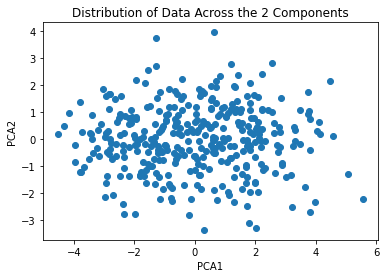

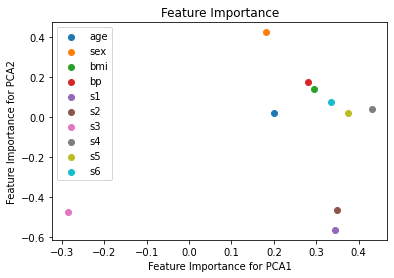

In [28]:
x = xtrain
feature_names = feature_names

pca(x, feature_names)

# Logistic Regression

#### Model CV (no hyper-parameter tuning) + PCA Plots

In [111]:
def log_reg_cv(xtrain,ytrain):
    
    #preprocess
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    
    #define the features according to 2 components
    pca = PCA(n_components=2)
    pca.fit(xtrain)
    x_pca = pca.transform(xtrain)
    
    
    classes = np.unique(ytrain)
    #are different color automatically added?
    for i in range(len(classes)):
        plt.scatter(x_pca[ytrain==i,0], x_pca[ytrain==i,1], label = classes[i])

    plt.title('Principal Components of Train Data Scatter According to Class')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    
    
    print('--- CROSS-VALIDATION ---')
    model = LogisticRegression()
    train_scores= cross_validate(model, xtrain, ytrain, cv=5, scoring = ('accuracy', 'neg_log_loss'))
    
    train_acc = (train_scores['test_accuracy'].mean())*100
    train_loss = (-train_scores['test_neg_log_loss'].mean())*100

    print(f'Accuracy (train, evaluation metric): {train_acc}')
    print(f'Log-loss/Cross-Entropy (train, loss-function): {train_loss}')

--- CROSS-VALIDATION ---
Accuracy (train, evaluation metric): 92.75903196726996
Log-loss/Cross-Entropy (train, loss-function): 18.44814973496598


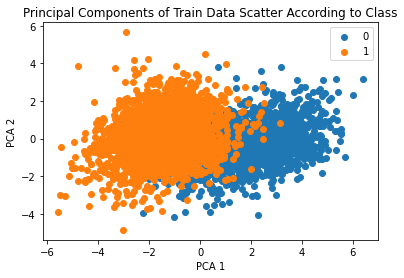

In [112]:
xtrain = xtrain
ytrain = ytrain


log_reg_cv(xtrain,ytrain)

#### Full Log Reg Algo

In [149]:
def log_reg(xtrain,xtest,ytrain,ytest):
    
    #--- PRE-Processing ---
    scaler = StandardScaler()
    
    xtrain = scaler.fit_transform(xtrain)
    xtest = scaler.transform(xtest)
    
    #create the logreg model
    model = LogisticRegression()
    model.fit(xtrain,ytrain)
    
    
    print('--- MODEL EVALUATION ---')
    ypred = model.predict(xtest)
    print(f'First few predicted classes on xtest:\n{ypred[:5]}')
    
    print(f'\n--- DATA EVALUATION ---')
    target_counts = Counter(ytest)
    target_proportions = {class_label: count / len(ytest) for class_label, count in target_counts.items()}
    print(f'Data Distribution Per Target Label (in TEST DATA):\n{target_proportions}')
        
        
    #accuracy = the % of times the model correctly predicts the class label for a given data point
    accuracy = (accuracy_score(ytest, ypred))*100
    print("\nAccuracy (%):", accuracy)
    
    #FIX UP THE PRINT OUT OF THIS!!!!


    titles_options = [("Confusion Matrix", None),
                        ("Normalized Confusion Matrix", "true")]
    
    
    #grab the title and normalizaiton arguement for each tuple 
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
                                                model,
                                                xtest,
                                                ytest,
                                                display_labels=np.unique(ytest),
                                                cmap=plt.cm.Blues,
                                               normalize=normalize)
        #for each matrix, print the title and the CM.
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    
    
    print('\n--- MODEL CV ---')
    logreg = LogisticRegression()
    #CV on train
    train_scores= cross_validate(logreg, xtrain, ytrain, cv=5, scoring = ('accuracy', 'neg_log_loss'))
    #accuracy (evaluation) - proportion of correct predictions out of total predictions
    train_acc = (train_scores['test_accuracy'].mean())*100
    #error term, the lower = the less dispartiy between predicted and actual probabilties
    train_loss = (-train_scores['test_neg_log_loss'].mean())*100
    print(f'Log-loss/Cross-Entropy (train, loss-function): {train_loss}')
    print(f'Accuracy (train, evaluation metric): {train_acc}')
    
    test_scores= cross_validate(logreg, xtest, ytest, cv=5, scoring = ('accuracy', 'neg_log_loss'))
    test_acc = (test_scores['test_accuracy'].mean())*100
    test_loss = (-test_scores['test_neg_log_loss'].mean())*100
    print(f'Log-loss/Cross-Entropy (test, loss-function): {test_loss}')
    print(f'Accuracy (test, evaluation metric): {test_acc}')
    
    
    print('\n--- SPECIFIC INSTANCE PREDICTION ---')
    logreg = LogisticRegression().fit(xtrain,ytrain)
    #input the data to predict on & scale it
    xv = scaler.transform([[3,4,5]])
    predv = logreg.predict(xv)
    print(f'Prediction @ specific instance: {predv}')
    

--- MODEL EVALUATION ---
First few predicted classes on xtest:
[0 1 0 0 1]

--- DATA EVALUATION ---
Data Distribution Per Target Label (in TEST DATA):
{0: 0.42706687730384413, 1: 0.5729331226961558}

Accuracy (%): 92.89099526066352
Confusion Matrix
[[1485  137]
 [ 133 2043]]
Normalized Confusion Matrix
[[0.91553637 0.08446363]
 [0.06112132 0.93887868]]

--- MODEL CV ---
Log-loss/Cross-Entropy (train, loss-function): 18.44814973496598
Accuracy (train, evaluation metric): 92.75903196726996
Log-loss/Cross-Entropy (test, loss-function): 18.44814973496598
Accuracy (test, evaluation metric): 92.75903196726996

--- SPECIFIC INSTANCE PREDICTION ---


ValueError: X has 3 features, but StandardScaler is expecting 7 features as input.

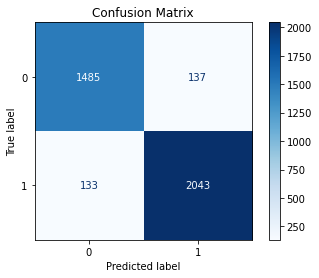

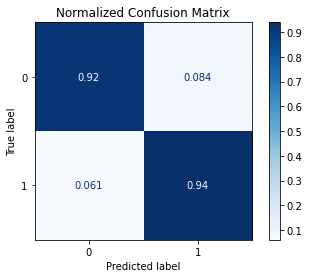

In [150]:
xtrain = xtrain
xtest = xtest
ytrain = ytrain
ytest = ytest

log_reg(xtrain,xtest,ytrain,ytest)

# KMeans
- Only unsupervised ML Algo
- no explicit loss function/model training (never split data here!)
- evalaute the model with the within cluster sse

#### Hypertune Number of Clusters

In [7]:
def find_optimal_clusters(x):
    
    """
    TODO: PCA options if more than 2 features exsist!
    """
    
    #preprocessing
    #algo relies on a distance metric so scaling is very imporant
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    #scattering --> just scattering data based on features, can 
    #we guess how many clusters would be optimal?
    plt.title('How Many Clusters Exsist?')
    plt.scatter(x[:,0], x[:,1])
    plt.xlabel('X feature @ index 0')
    plt.ylabel('X feature @ index 1')
    plt.show()
    
    #evalaution metric --> lower value = tighter cluster = better clustering
    within_cluster_sse = []
    
    #testing the performance of the model @ variable cluster amoutns
    clusters = range(1,11)
    
    for i in clusters:
        #instantiate a model @ the variable clusters
        kmeans = KMeans(n_clusters=i, n_init="auto", max_iter= 5000)
        #no explicit training here
        #calculate the distance of each point in the data to the each centroid to find the closest centroid
        kmeans.fit(x)
        #how distinct are clusters?
        within_cluster_sse.append(kmeans.inertia_)
        
    plt.plot(clusters,within_cluster_sse)
    print(f'Cluster specific sse @ varying cluster values:\n{within_cluster_sse}')
    plt.title('Evaluating KMeans Performance @ Varying Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within Cluster Sum of Squared Error')
    

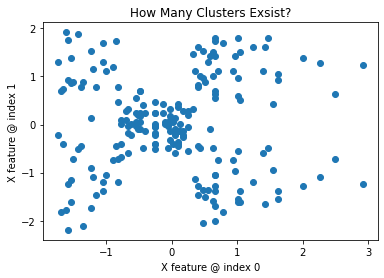

Cluster specific sse @ varying cluster values:
[400.00000000000006, 276.7151064656922, 167.2259420072703, 131.2481734187388, 72.28777536884823, 63.71437733513825, 56.1608243038999, 44.70973969914205, 37.839223618997515, 35.11116874566735]


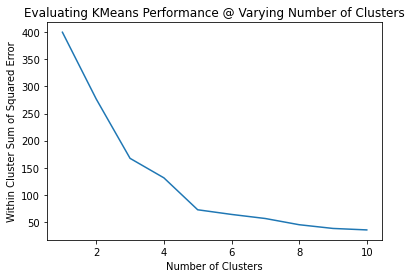

In [8]:
x = x

find_optimal_clusters(x)

#### KMeans @ optimal clusters

In [14]:
def hypertuned_kmeans(x, optimal_clusters):
    
    #PRE-PROCESSEING OF X
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    #initalize the model @ the optimal nunmber of clusters
    model = KMeans(n_clusters=optimal_clusters, n_init="auto", max_iter=5000)
    
    #fit the model --> apply the algorithm
    model.fit(x)
    
    
    print('--- MODEL EVALAUTION ---')
    #the aggregate distances of each point to the cluster cetners
    #the lower the better --> indicates clusters that are more segregated
    print(f'Within Cluster SSE: {model.inertia_}')
    #the location (on the plane) of the finalized cluster centers
    print(f'Cluster Centers:\n{model.cluster_centers_}')
    #predicted classes for x data
    print(f'First few predicted classes on x:\n{model.labels_[:5]}')
    
    
    #array holding all the labels per x value
    y = model.labels_
    #plotting all the feature data, and we are going to color points according to their assigned clusters
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c = 'red', s = 100)
    plt.title('Data Colored According to its Predicted Class, With Centroids')
    
    
    print('\n--- SPECIFIC POINT PREDICTION ---')
    #x must have 2 features 
    xv = scaler.transform([[1250,24]])
    ypredv = model.predict(xv)
    print(f'Prediction @ specific x: {ypredv}')
    
    

--- MODEL EVALAUTION ---
Within Cluster SSE: 72.28777536884823
Cluster Centers:
[[ 1.05500302 -1.25128077]
 [-1.32954532  1.15889959]
 [-0.20185502 -0.01794655]
 [ 0.99158305  1.18233597]
 [-1.30419961 -1.14601722]]
First few predicted classes on x:
[4 1 4 1 4]

--- SPECIFIC POINT PREDICTION ---
Prediction @ specific x: [4]


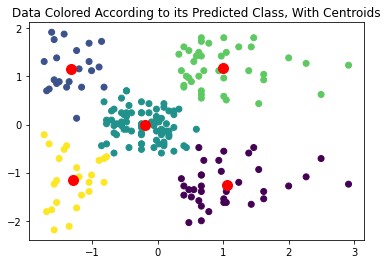

In [15]:
x = x
optimal_clusters = 5 

hypertuned_kmeans(x, optimal_clusters)

# KNN: K NEAREST NEIGHBORS
- tune number of neighbors and weights applied 
- predicts a class based on majority vote of neighbors

#### Hypertuning num of neighbors + weights

In [45]:
def hypertune_n_weights(xtrain,ytrain):
    #preprocess
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    
    
    #the average (cross-validated across across 5 folds, CV on the train data)
    accuracy = []
    
    #testing the algorithms performane with neighbors ranging from 1 to 51.
    num_neighbors = np.arange(1,51)
    
    for i in num_neighbors:
        #instantiate a modoel considering that number of neighbors
       # model = neighbors.KNeighborsClassifier(n_neighbors=i, weights=weights)
        model = KNeighborsClassifier(n_neighbors=i, weights='uniform')
        #scross validate that model against 5 folds of training data, storing the accuracy
        scores = cross_validate(model, xtrain, ytrain, cv=5, scoring = ('accuracy', 'neg_log_loss'))
        #record the average accuracy
        accuracy.append(scores['test_accuracy'].mean())
        
        
    accuracy2 = []
    for i in num_neighbors:
        #instantiate a modoel considering that number of neighbors
       # model = neighbors.KNeighborsClassifier(n_neighbors=i, weights=weights)
        model = KNeighborsClassifier(n_neighbors=i, weights='distance')
        #scross validate that model against 5 folds of training data, storing the accuracy
        scores2 = cross_validate(model, xtrain, ytrain, cv=5, scoring = ('accuracy', 'neg_log_loss'))
        #record the average accuracy
        accuracy2.append(scores2['test_accuracy'].mean())
      
    
    
    print('--- HYPERTUNING RESULTS ---')
    print(f'Maximum Accuracy (uniform): {np.max(accuracy)}')
    print(f'Maximum Accuracy (distance): {np.max(accuracy2)}')

    print(f'Number of Neighbors Considered @ Maximum Accuracy (uniform): {accuracy.index(np.max(accuracy))}')
    print(f'Number of Neighbors Considered @ Maximum Accuracy (distance): {accuracy2.index(np.max(accuracy2))}')


    plt.figure(1)
    plt.plot(num_neighbors, accuracy)
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Cross-Validated Accuracy')
    plt.title('UNIFORM WEIGHTS --> How Many Neighbors Should the Algo Consider?')


    plt.figure(2)
    plt.plot(num_neighbors, accuracy2)
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Cross-Validated Accuracy')
    plt.title('DISTANCE WEIGHTS --> How Many Neighbors Should the Algo Consider?')
    plt.show()

    
    
    

--- HYPERTUNING RESULTS ---
Maximum Accuracy (uniform): 0.9294338118022327
Maximum Accuracy (distance): 0.92864503155121
Number of Neighbors Considered @ Maximum Accuracy (uniform): 49
Number of Neighbors Considered @ Maximum Accuracy (distance): 43


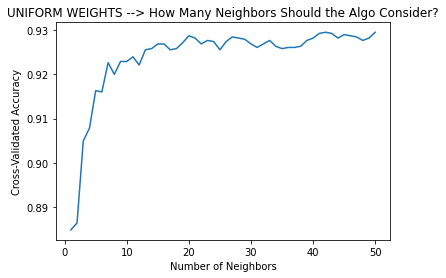

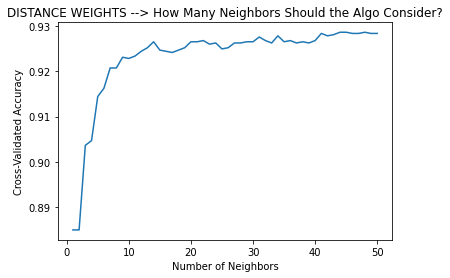

In [46]:
xtrain = xtrain
ytrain = ytrain

hypertune_n_weights(xtrain,ytrain)

#### CV on Train @ Optimals + PCA Plots on Train

In [48]:
#optimals are weights = 'uniform', neighbors = 22

def cv_pca(xtrain,ytrain,optimal_n,optimal_weights):
    """
    Informs us on the models aggregate performance on train
    +
    utilizes PCA to visualize the train data.
    """
    
    #preprocess
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)

    pca = PCA(n_components=2)
    pca.fit(xtrain)
    x_pca = pca.transform(xtrain)


    classes = np.unique(ytrain)
    #are different color automatically added?
    for i in range(len(classes)):
        plt.scatter(x_pca[ytrain==i,0], x_pca[ytrain==i,1], label = classes[i])

    plt.title('Principal Components of Train Data Scatter According to Class')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()

    #now we want to cross-validate on train
    #data performance --> how well does KNN perform on aggregate
    print('--- CROSS-VALIDATION ---')
    #BE SURE TO SET UP OPTIMALS HERE!
    knn = KNeighborsClassifier(n_neighbors=optimal_n, weights=optimal_weights)
    train_scores= cross_validate(knn, xtrain, ytrain, cv=5, scoring = ('accuracy', 'neg_log_loss'))

    train_acc = (train_scores['test_accuracy'].mean())*100
    train_loss = (-train_scores['test_neg_log_loss'].mean())*100

    print(f'Accuracy (train, evaluation metric): {train_acc}')
    print(f'Log-loss/Cross-Entropy (train, loss-function): {train_loss}')


--- CROSS-VALIDATION ---
Accuracy (train, evaluation metric): 92.68004992718953
Log-loss/Cross-Entropy (train, loss-function): 36.58535085187699


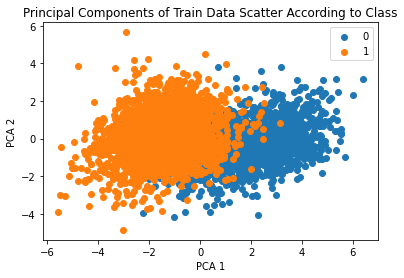

In [49]:
xtrain = xtrain
ytrain = ytrain
optimal_n = 22
optimal_weights = 'uniform'

cv_pca(xtrain,ytrain,optimal_n,optimal_weights)

#### Full Algo + Specific Instance Prediction

In [65]:
def knn(xtrain,ytrain,xtest,ytest,optimal_n,optimal_weights):
    
    #preprocess
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    xtest = scaler.transform(xtest)
    
    
    #PCA for plotting purposes
    pca = PCA(n_components=2)
    #fit to the train
    pca.fit(xtrain)
    #but we want to plot test for evalaution purposes
    x_pca = pca.transform(xtest)
    
    
    #instantiate the model @ optimal parameters
    model = KNeighborsClassifier(n_neighbors=optimal_n, weights=optimal_weights)
    model.fit(xtrain,ytrain)
    
    
    print('--- MODEL EVALUATION ---')
    ypred = model.predict(xtest)
    print(f'The first few predicted classes on xtest:\n{ypred[:5]}')
    
    #were are missing a printout of testing accuracy
    train_accuracy = ((accuracy_score(ytrain, model.predict(xtrain)))*100).round(2)
    print(f'Training Accuracy: {train_accuracy}')
    test_accuracy = ((accuracy_score(ytest, ypred))*100).round(2)
    print(f'Testing Accuracy: {test_accuracy}')
    
    
    #CM
    cm = confusion_matrix(ytest, ypred)
    print(cm)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title('Confusion Matrix')
    plt.show()
    
    classes = np.unique(ytrain)
    sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue = classes[ypred])
    plt.title('Scatter of Components, Colored According to Predicted Values')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')

    plt.figure(2)
    sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue = classes[ytest])
    plt.title('Scatter of Components, Colored According to TRUE Values')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()
    
    
    print('--- SPECIFIC INSTANCE PREDICITON ---')
    xv = scaler.transform([[1.14420000e+04, 4.37259979e+02, 1.81247345e+02, 8.21519089e+01,
           8.92423332e-01, 1.16290000e+04, 8.27823102e-01]])
    predv = model.predict(xv)
    print(f'Prediction @ Specific Instance: {predv}')
    
    

--- MODEL EVALUATION ---
The first few predicted classes on xtest:
[0 1 0 0 1]
Training Accuracy: 93.26
Testing Accuracy: 93.26
[[1494  128]
 [ 128 2048]]


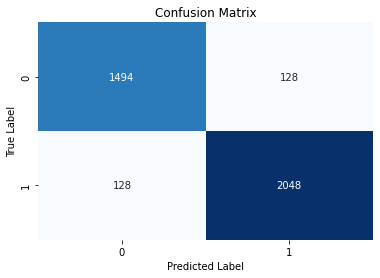

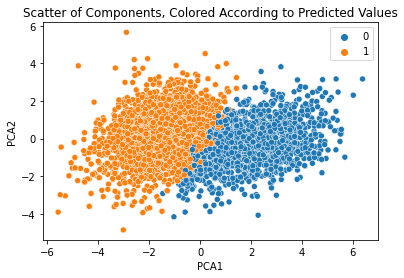

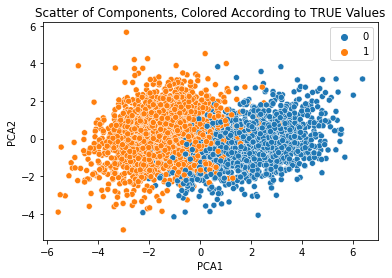

--- SPECIFIC INSTANCE PREDICITON ---
Prediction @ Specific Instance: [1]


In [66]:
xtrain = xtrain
ytrain = ytrain

xtest = xtest
ytest = ytest

optimal_n = 22
optimal_weights = 'uniform'


knn(xtrain,ytrain,xtest,ytest,optimal_n,optimal_weights)

# SVM
- Seperates data by findining the maximal marginal hyperplane
- no explicit parameter tuning here
- see CV for average model performance

#### SVM CV & PCA Plots {algo pre-step}

In [73]:
def svm_cv_pca(xtrain,ytrain):
    
    #pre-processing
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    
    #reduce the dimensioality of train data
    pca = PCA(n_components=2)
    pca.fit(xtrain)
    x_pca = pca.transform(xtrain)

    
    
    #plot the dimensioality reduced train data, colored according to classes
    classes = np.unique(ytrain)
    for i in range(len(classes)):
        plt.scatter(x_pca[ytrain==i,0], x_pca[ytrain==i,1], label = classes[i])
        
        
    plt.title('Principal Components of Train Data Scatter According to Class')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    
    
    print('--- CROSS-VALIDATION ---')
    #we do not fit the model when cross-validating, simply instantiate
    model = svm.SVC()
    train_scores= cross_validate(model, xtrain, ytrain, cv=5, scoring = ('accuracy', 'neg_log_loss'))

    train_acc = (train_scores['test_accuracy'].mean())*100
    train_loss = (-train_scores['test_neg_log_loss'].mean())*100

    print(f'Accuracy (train, evaluation metric): {train_acc}')
    #in reality SVM minimizes hinge loss, but ok... hahah
    print(f'Log-loss/Cross-Entropy (train, loss-function): {train_loss}')
    

--- CROSS-VALIDATION ---
Accuracy (train, evaluation metric): 92.9695929547188
Log-loss/Cross-Entropy (train, loss-function): nan


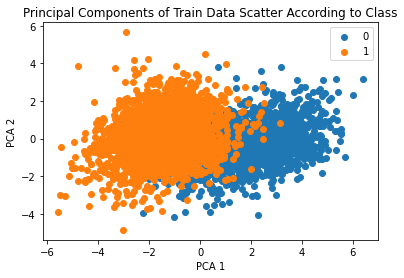

In [74]:
xtrain = xtrain
ytrain = ytrain

svm_cv_pca(xtrain,ytrain)

#### SVM Full Algorithm

In [88]:
def svm_algo(xtrain,ytrain,xtest,ytest):

    
    #preprocess
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)

    #instantiate the model, no parameters
    model = svm.SVC().fit(xtrain, ytrain)


    print('--- EVALUATION ---')
    #predict on test
    ypred = model.predict(xtest)
    print(f'First Few Predictions on Test:\n{ypred[:5]}')
    print("Train Accuracy Score {}".format(model.score(xtrain,ytrain)))
    print("Test Accuracy Score {}".format(model.score(xtest,ytest)))


    #CM
    plt.figure(1)
    disp = ConfusionMatrixDisplay.from_estimator(
         model,
         xtest,
         ytest,
         display_labels=np.unique(ytrain),
         cmap=plt.cm.Blues,
         normalize='true')
    disp.ax_.set_title('Normalized confusion matrix')
    plt.show()

    #reduce the dimensioality of TEST data --> Plot for model evaluation
    pca = PCA(n_components=2)
    pca.fit(xtrain)
    x_pca = pca.transform(xtest)


    #plot the dimensioality reduced TEST data, colored according to classes
    #scatterplot of the PCA data, colored according to its true label
    plt.figure(2)
    classes = np.unique(ytest)
    for i in range(len(classes)):
        plt.scatter(x_pca[ytest==i,0], x_pca[ytest==i,1], label = classes[i])


    plt.title('Principal Components of Test Data Scatter According to Class')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.show()


    print('--- CROSS-VALIDATION ---')
    #CV on the test to get a final sense of model average performance
    model_svm = svm.SVC()
    test_scores= cross_validate(model_svm, xtest, ytest, cv=5, scoring = ('accuracy', 'neg_log_loss'))

    test_acc = (test_scores['test_accuracy'].mean())*100
    test_loss = (-test_scores['test_neg_log_loss'].mean())*100

    print(f' 5-fold Average Accuracy Test (test, evaluation metric): {test_acc}')
    print(f' 5-fold Log-loss/Cross-Entropy (test, loss-function): {test_loss}')


    print('\n--- PREDICTION @ SPECIFIC INSTANCE ---')
    model_svm.fit(xtrain,ytrain)
    xv = scaler.transform([[1.14420000e+04, 4.37259979e+02, 1.81247345e+02, 8.21519089e+01,
               8.92423332e-01, 1.16290000e+04, 8.27823102e-01]])
    predv = model_svm.predict(xv)
    print(f' Prediction @ Specific Instance: {predv}')
    


--- EVALUATION ---
First Few Predictions on Test:
[1 1 1 1 1]
Train Accuracy Score 0.9320695102685624
Test Accuracy Score 0.5729331226961558


<Figure size 432x288 with 0 Axes>

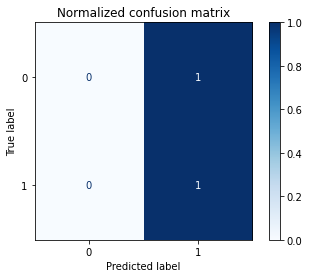

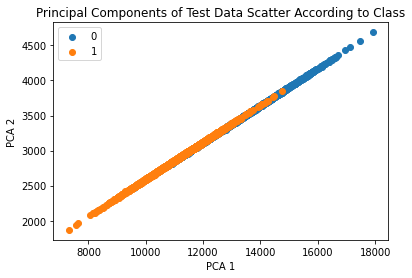

--- CROSS-VALIDATION ---
 5-fold Average Accuracy Test (test, evaluation metric): 88.12502600374455
 5-fold Log-loss/Cross-Entropy (test, loss-function): nan

--- PREDICTION @ SPECIFIC INSTANCE ---
 Prediction @ Specific Instance: [1]


In [89]:
xtrain = xtrain
ytrain = ytrain

xtest = xtest
ytest = ytest

svm_algo(xtrain,ytrain,xtest,ytest)

# DT 

#### DT Hypertune Depth + Feature Importances + General CV

In [94]:
#function to find the optimal depth DT + print out feature importance @ each depth

def optimal_depth(xtrain,ytrain):
    """
    - Determines the Optimal Depth
    - Determine Feature Importances (when depth is restricted, what do we choose to split on?)
    """
        
    #acc score @ each depth
    acc_score = []
    
    #the depths we will test in search for the optimal [1,20]
    depths =  np.arange(1,21)
    
    print('--- IMPURITY REDUCTIONS @ EACH LEVEL ---')
    for depth in depths:
        #instantiate a DT model @ that depth
        model = DecisionTreeClassifier(criterion="gini", max_depth=depth)
        model.fit(xtrain,ytrain)
        
        #the more impurity a feature can reduce, the more important that feature is
        print(f'Impurity Reductions per Feature (Importance):\n{model.feature_importances_}')
        #appending the TRAIN (change to test if accessible) accuracy score
        acc_score.append(model.score(xtrain,ytrain))
        
    
    plt.plot(depths,acc_score)
    plt.title('Accuracy Score per Tree Depth')
    plt.xlabel('Depth of Tree')
    plt.ylabel('Classification Accuracy') 
    plt.show()
    print(f'Accuracy Scores @ Varying Depths [1-N]:\n{acc_score}')
    
    
    print('--- Cross Validation ---')   
    #instantiate a model @ defaults
    dt = DecisionTreeClassifier(criterion="gini")
    #CV on the train data
    cv_acc_scores = cross_val_score(dt,xtrain,ytrain, cv = 5, scoring = 'accuracy')
    mean_acc = ((np.mean(cv_acc_scores))*100).round(2)
    print(f'CV accuracy: {mean_acc}%')
        
        
        

--- IMPURITY REDUCTIONS @ EACH LEVEL ---
Impurity Reductions per Feature (Importance):
[0. 0. 1. 0. 0. 0. 0.]
Impurity Reductions per Feature (Importance):
[0.        0.0357012 0.9642988 0.        0.        0.        0.       ]
Impurity Reductions per Feature (Importance):
[0.00000000e+00 3.52261285e-02 9.64111975e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.61896548e-04]
Impurity Reductions per Feature (Importance):
[6.78521310e-04 3.48048579e-02 9.57676864e-01 4.53735868e-03
 0.00000000e+00 0.00000000e+00 2.30239855e-03]
Impurity Reductions per Feature (Importance):
[0.00148468 0.03515657 0.95233083 0.00313697 0.00201128 0.00159161
 0.00428805]
Impurity Reductions per Feature (Importance):
[6.41886895e-04 3.82355792e-02 9.40149808e-01 5.02619742e-03
 5.51987303e-03 3.90850571e-03 6.51814944e-03]
Impurity Reductions per Feature (Importance):
[0.0021466  0.03978648 0.92590001 0.00613577 0.00971307 0.00555341
 0.01076467]
Impurity Reductions per Feature (Importance):
[0.00294447 

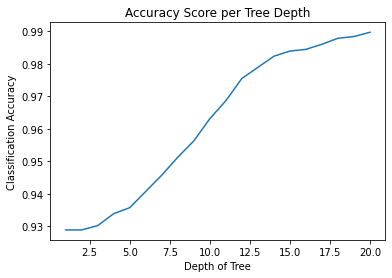

Accuracy Scores @ Varying Depths [1-N]:
[0.9289099526066351, 0.9289099526066351, 0.9302264349657715, 0.9339125855713534, 0.9357556608741443, 0.9407582938388626, 0.9457609268035808, 0.9512901527119536, 0.956292785676672, 0.9631384939441812, 0.968667719852554, 0.9755134281200631, 0.9789362822538178, 0.9823591363875724, 0.983938915218536, 0.9844655081621906, 0.9860452869931543, 0.9878883622959452, 0.9884149552395998, 0.9897314375987362]
--- Cross Validation ---
CV accuracy: 88.99%


In [95]:
xtrain = xtrain
ytrain = ytrain

optimal_depth(xtrain,ytrain)

#### CV @ Optiamls

In [100]:
#determine that the optimal depth was 20

def cv_dt_optimal(xtrain,ytrain,optimal_depth):
    """
    
    performance does NOT improve by much when I CV @ 
    optimals rather than defaults...
    
    """
    
    print('--- Cross Validation ---')   
    dt = DecisionTreeClassifier(criterion="gini", max_depth=optimal_depth)
    #takes in the entire x & y, function splits for us
    acc_scores = cross_val_score(dt,xtrain,ytrain, cv = 5, scoring = 'accuracy')
    mean_acc = ((np.mean(acc_scores))*100).round(2)
    print(f'Cross-Validation Accuracy: {mean_acc}%')

In [99]:
xtrain = xtrain
ytrain = ytrain
optimal_depth = 20

cv_dt_optimal(xtrain,ytrain,optimal_depth)

--- Cross Validation ---
Cross-Validation Accuracy: 88.91%


#### DT @ Optimals + CV & Prediction

In [104]:

def tuned_DT(xtrain,ytrain,xtest,ytest,optimal_depth):
    """
    Instantiates a model @ the optimal depth 
    - displays normalized + non-normalized CM
    - prints out the DT
    - predicts on xtest + evalautes model
    - returns the CV'd accuracy 
    - and predict on unseen data
    """

    #instantiate the model @ the optimal depth and fit
    model = DecisionTreeClassifier(criterion="gini", max_depth=optimal_depth)
    model.fit(xtrain,ytrain)
    
    
    titles_options = [("Confusion Matrix", None),
                        ("Normalized Confusion Matrix", "true")]
    
    
    #grab the title and normalizaiton arguement for each tuple 
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
                                                model,
                                                xtest,
                                                ytest,
                                                display_labels=np.unique(ytrain),
                                                cmap=plt.cm.Blues,
                                               normalize=normalize)
        #for each matrix, print the title and the CM.
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
        
        
        #printing out the tree generated --> 
        #NEED TO UPDATE TO INPUT FEATURE & LABEL NAMES FOR TREE PRINTOUT!!!!
       # plt.figure()
       # plot_tree(model, feature_names = feature_names, class_names = target_names, filled = True)
       # plt.title('Trained Decision Tree')
       # plt.show()
        
        
        print('--- MODEL EVALUATION ---')
        training_score = ((model.score(xtrain,ytrain))*100).round(2)
        print(f'Training Score (Accuracy): {training_score}%')
        ypred = model.predict(xtest)
        print(f'First few predicted classes on xtest: {ypred[:3]}')
        testing_score = ((model.score(xtest,ytest))*100).round(2)
        print(f'Testing Score (Accuracy): {testing_score}%')
        
        
        print('\n--- FEATURE IMPORTANCE ---')
        #the more inpurity a feature can reduce, the more important
        print(f'Impurity Reductions per Feature (Importance):\n{model.feature_importances_}')

        
        print('\n--- Predictions on Unseen Data ---')
        new_x = [[1.14420000e+04, 4.37259979e+02, 1.81247345e+02, 8.21519089e+01,
               8.92423332e-01, 1.16290000e+04, 8.27823102e-01]]
        new_pred = model.predict(new_x)
        print(f'Classificaiton of New Data: {new_pred}')



Confusion Matrix
[[1603   19]
 [  17 2159]]
--- MODEL EVALUATION ---
Training Score (Accuracy): 99.05%
First few predicted classes on xtest: [0 1 0]
Testing Score (Accuracy): 99.05%

--- FEATURE IMPORTANCE ---
Impurity Reductions per Feature (Importance):
[0.02112871 0.06038978 0.81278472 0.02307158 0.02769884 0.0201057
 0.03482067]

--- Predictions on Unseen Data ---
Classificaiton of New Data: [0]
Normalized Confusion Matrix
[[0.98828607 0.01171393]
 [0.0078125  0.9921875 ]]
--- MODEL EVALUATION ---
Training Score (Accuracy): 99.05%
First few predicted classes on xtest: [0 1 0]
Testing Score (Accuracy): 99.05%

--- FEATURE IMPORTANCE ---
Impurity Reductions per Feature (Importance):
[0.02112871 0.06038978 0.81278472 0.02307158 0.02769884 0.0201057
 0.03482067]

--- Predictions on Unseen Data ---
Classificaiton of New Data: [0]


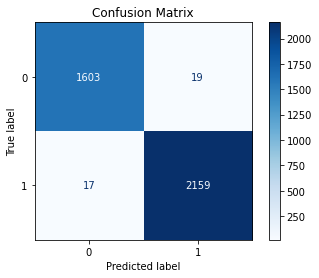

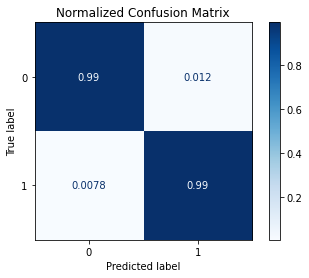

In [105]:
xtrain = xtrain
ytrain = ytrain
xtest = xtest
ytest = ytest

optimal_depth = 20


tuned_DT(xtrain,ytrain,xtest,ytest,optimal_depth)

# RF

#### RF Hypertune Depth + Feature Imporances

In [119]:
def hypertune_RF(xtrain,ytrain):
    
    """
    Hypertunes the number of trees --> n_estimators
    &
    max depth of each tree --> max_depth
    """
    #model instance
    model = RandomForestClassifier().fit(xtrain,ytrain)
    
    #parameter values to test (trees & the max depth of each tree)
    param_dict = {'n_estimators': randint(5,50),
             'max_depth': randint(1,8)}
    
    #test and CV 5 random parameter combinations
    rand_search = RandomizedSearchCV(model, param_distributions = param_dict,
                  n_iter = 5, cv = 5)
    
    #fit to the train data
    rand_search.fit(xtrain,ytrain)
    #return the optimal hyper-parameters
    best_rf = rand_search.best_estimator_
    print(f'Optimal Hyperparameter, RF: {rand_search.best_params_}')
    
    
    #which features maximally reduce impurity (aggregated from the various trees)
    feature_importances = best_rf.feature_importances_
    print('\n--- FEATURE IMPORTANCES ---')
    for i, importance in enumerate(feature_importances):
        print(f'Feature {i+1}: {importance}')
        
        
    print('\n--- CROSS-VALIDATION ---')
    rf = RandomForestClassifier(criterion="gini")
    #takes in the entire x & y, function splits for us
    acc_scores = cross_val_score(rf,xtrain,ytrain, cv = 5, scoring = 'accuracy')
    mean_acc = ((np.mean(acc_scores))*100).round(2)
    print(f'CV Accuracy (CV @ Parameter Defaults): {mean_acc}%')
    
    #CV the optimal model
    rand_search2 = rand_search.best_estimator_
    acc_scores2 = cross_val_score(rand_search2,xtrain,ytrain, cv = 5, scoring = 'accuracy')
    mean_acc2 = ((np.mean(acc_scores2))*100).round(2)
    print(f'CV Accuracy (CV Optimal Parameters): {mean_acc2}%')

In [120]:
xtrain = xtrain
ytrain = ytrain

hypertune_RF(xtrain,ytrain)

Optimal Hyperparameter, RF: {'max_depth': 6, 'n_estimators': 38}

--- FEATURE IMPORTANCES ---
Feature 1: 0.18336612143531808
Feature 2: 0.2451009861462026
Feature 3: 0.30716930129120107
Feature 4: 0.03056568795120734
Feature 5: 0.0876314675082993
Feature 6: 0.1369501050504083
Feature 7: 0.009216330617363341

--- CROSS-VALIDATION ---
CV Accuracy (CV @ Parameter Defaults): 92.26%
CV Accuracy (CV Optimal Parameters): 92.55%


#### Manually finding Optimal Depth + Plot

In [124]:
def RF_optimal_depth(xtrain,ytrain):
        
    #empty list to hold model accuracy (on tests) @ varying depths
    accuracy_score = []
    
    #testing depths up untill the number of features, in addition to None 
    depths = np.arange(1,21)

    
    for i in depths:
        #for each depth, instantiate a classifier @ that depth
        model = RandomForestClassifier(criterion="gini", max_depth=i)
        model.fit(xtrain,ytrain)
        #feature_importances_ --> displays the reductions in impurity when splitting 
        #by a feature @ that depth
        #print(f'Feature Importance @ depth {i}: {model.feature_importances_}')
        accuracy_score.append(model.score(xtest,ytest))
        
        
    print(f'\nAccuracy Scores: {accuracy_score}')
    plt.plot(depths,accuracy_score)
    plt.xlabel('Tree Depth')
    plt.ylabel('Accuracy Score')
    plt.title('Model Performance @ Various Depths')
    plt.show()
    


Accuracy Scores: [0.9144286466561348, 0.9270668773038442, 0.9310163243812533, 0.9344391785150079, 0.9386519220642443, 0.942074776197999, 0.9491837809373355, 0.9557661927330173, 0.9634017904160084, 0.9752501316482359, 0.9881516587677726, 0.9955239599789363, 0.9984202211690363, 0.9989468141126909, 0.9997367035281727, 1.0, 1.0, 1.0, 1.0, 1.0]


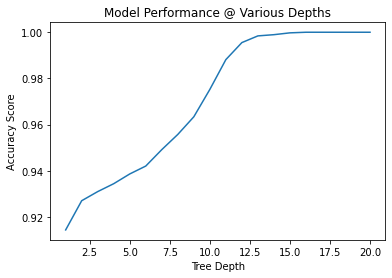

In [125]:
xtrain = xtrain
ytrain = ytrain

RF_optimal_depth(xtrain,ytrain)

#### RF @ Optimal 

In [128]:
def hypertuned_RF(xtrain,ytrain,xtest,ytest,optimal_depth):
    
    #depth is optimized
    model =  RandomForestClassifier(criterion="gini", max_depth=optimal_depth)
    model.fit(xtrain,ytrain)
    
    
    #arg for plot titles + normalization
    titles_options = [
                    ("Confusion Matrix", None), #dont normalzie
                    ("Normalized Confusion Matrix", "true")] #add arg to normalize

    
    #iterate through the title and normalzation option
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
                                                model,
                                                xtest,
                                                ytest,
                                                display_labels=np.unique(ytest),
                                                cmap=plt.cm.Blues, normalize=normalize)
        
        #set the title accordingly
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
        plt.show()
        
    
    print('--- MODEL EVALUATION ---')
    training_score = ((model.score(xtrain,ytrain))*100).round(2)
    print(f'Training Score: {training_score}%')
    ypred = model.predict(xtest)
    print(f'First few predicted classes on xtest: {ypred[:5]}')
    testing_score = ((accuracy_score(ytest,ypred))*100).round(2)
    print(f'Testing Score: {testing_score}%')
    
        
    print('\n--- FEATURE IMPORTANCE ---')
    print(f'Impurity Reductions per Feature (Importance):\n{model.feature_importances_}')
    
    
    print('\n--- Instance Prediction ---')
    #add here the ability to predict on unseen data! + CV
    #prediction @ specific point
    new_x = [[2.4, 2.5, 3.6, 7.5]]
    new_pred = model.predict(new_x)
    print("Predictions for new data:", new_pred)
    
        

Confusion Matrix
[[1565   57]
 [  29 2147]]


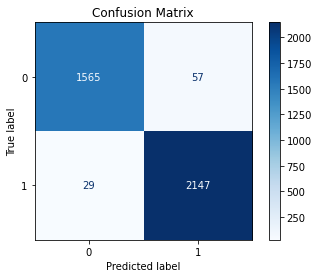

Normalized Confusion Matrix
[[0.9648582  0.0351418 ]
 [0.01332721 0.98667279]]


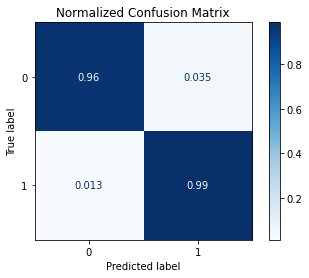

--- MODEL EVALUATION ---
Training Score: 97.74%
First few predicted classes on xtest: [0 1 0 0 1]
Testing Score: 97.74%

--- FEATURE IMPORTANCE ---
Impurity Reductions per Feature (Importance):
[0.14702187 0.24224835 0.3247476  0.0343701  0.0769011  0.14988806
 0.02482292]

--- Instance Prediction ---


ValueError: X has 4 features, but RandomForestClassifier is expecting 7 features as input.

In [129]:
xtrain = xtrain
ytrain = ytrain

xtest = xtest
ytest = ytest

optimal_depth = 10

hypertuned_RF(xtrain,ytrain,xtest,ytest,optimal_depth)

#### Manual CV of DT + RF Classifiers (find best model between the 2, optimal depth)

In [130]:
def manual_hypertune_depths(x,y,num_cv=3):

    """
    The purpose of this function is to find the better model (DT/RF)
    & the optimal depth.
    """

    #avg (averaged across the N folds) accuracy @ a depth 
    avg_acc_dt = []
    avg_acc_rf = []

    for i in range(num_cv):
        #for each fold DT and RF recieve the same split of data
        xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size = .80)

        #testing accuracy for the DT model @ various depths
        dt_acc = []
        #testing acc for the RF models @ various depths
        rf_acc = []
        depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]


        for depth in depths:
            # ----- DECISION TREE ----- #
            #both models will be fitted on the same folds of data
            dt = DecisionTreeClassifier(criterion = 'gini', max_depth = depth)
            dt.fit(xtrain,ytrain)
            dt_acc.append(dt.score(xtest,ytest))

            # ----- RANDOM FOREST ----- #
            rf = RandomForestClassifier(criterion = 'gini', max_depth = depth)
            rf.fit(xtrain,ytrain)
            rf_acc.append(rf.score(xtest,ytest))

        #For the current fold, append the accuracy scores to the larger score list
        #do that for everyfold
        avg_acc_dt.append(dt_acc)
        avg_acc_rf.append(rf_acc)

    #then average the acccuracy scores per depth
    avg_acc_dt = np.mean(avg_acc_dt, axis = 0)
    avg_acc_rf = np.mean(avg_acc_rf, axis = 0)


    plt.plot(depths,avg_acc_dt, label = 'DT')
    plt.plot(depths,avg_acc_rf, label = 'RF')
    plt.legend()
    plt.xlabel('Depths 1:N')
    plt.ylabel('Model Accuracy')
    plt.title('Model Performance at Variable Depths')
    plt.show()

# NN for Classification

#### Simple CV on Train

In [138]:
def cv_nn_class(xtrain,ytrain):

    print('--- CROSS-VALIDATION ---')
    model = MLPClassifier(
                        hidden_layer_sizes=(20,),
                        max_iter=8,
                        alpha=1e-4,
                        solver="sgd",
                        verbose=10,
                        random_state=1,
                        learning_rate_init=0.5,
                        )
    
    train_scores= cross_validate(model, xtrain, ytrain, cv=5, scoring = ('accuracy', 'neg_log_loss'))
    
    train_acc = (train_scores['test_accuracy'].mean())*100
    train_loss = (-train_scores['test_neg_log_loss'].mean())*100

    print(f'Accuracy (train, evaluation metric): {train_acc}')
    print(f'Log-loss/Cross-Entropy (train, loss-function): {train_loss}')
    
    

In [139]:
xtrain = xtrain
ytrain = ytrain

cv_nn_class(xtrain,ytrain)

--- CROSS-VALIDATION ---
Iteration 1, loss = 4342123902.07866669
Iteration 2, loss = 11953447239.91903687
Iteration 3, loss = 14034315519.08135414
Iteration 4, loss = 14441826124.22352028
Iteration 5, loss = 14516932573.14140892
Iteration 6, loss = 14529677507.15763855
Iteration 7, loss = 14530840575.18901634
Iteration 8, loss = 14529856728.25058365
Iteration 1, loss = 4211920313.64775562
Iteration 2, loss = 11595008292.04628372
Iteration 3, loss = 13613478953.90761757
Iteration 4, loss = 14008769806.54279900
Iteration 5, loss = 14081624087.60334969
Iteration 6, loss = 14093986847.53243828
Iteration 7, loss = 14095115039.28010368
Iteration 8, loss = 14094160694.18702507
Iteration 1, loss = 4608460990.62638569
Iteration 2, loss = 12686640432.33325958
Iteration 3, loss = 14895142396.95122719
Iteration 4, loss = 15327648361.16748619
Iteration 5, loss = 15407361591.29844856
Iteration 6, loss = 15420888256.71569252
Iteration 7, loss = 15422122662.67074394
Iteration 8, loss = 15421078468.969

#### Hypertune Number of Epochs (or iterations, #feeds of training data) PRE-SPLIT VERSION

In [140]:
#reviewing the hyper-tuning NN code
#only considers the folds of data related to train when pre-processing

def hypertune_epoch(xtrain,ytrain):
    
    #preprocess 
    scaler = StandardScaler().fit(xtrain)
    train = scaler.transform(xtrain)
        
    
    #instantiate an instance of the MLP Classifer @ random parameters
    model = MLPClassifier(
                        hidden_layer_sizes=(20,),
                        max_iter=8,
                        alpha=1e-4,
                        solver="sgd",
                        verbose=10,
                        random_state=1,
                        learning_rate_init=0.5,
                        )
    
    #10 iterations - 10 passes of the entire training set into the model
    epochs = 10

    train_score = []
    
    #the loss function of classificaiton nueral networks is the cross-entropy loss
    loss = []
    
    for i in range(epochs):
        #progressiley fit the model on more and more passes of the ENTIRE training data?
        model.partial_fit(xtrain, ytrain,classes=np.unique(ytrain))
        train_score.append(model.score(xtrain,ytrain))
        #difference in predicted and actual probability distribution
        loss.append(model.loss_)
        
    #pick the epoch where accuracy beging to plateu 
    #no more improvement in accuracy when we re-feed the training data another time
    plt.figure(1)
    #on the x points 1-11 (representing the epochs)
    #on the y plot the training accuracy
    plt.plot(np.arange(1,epochs+1), train_score, label = 'train')
    plt.xlabel('Number of Epochs {Times Training Data was Re-Fed}')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.title('Accuracy Score per Epoch')

    
    #pick the epoch value were loss beging to platue (no more reduction in)
    #loss with an addition pass of training data
    plt.figure(2)
    plt.plot(np.arange(1,epochs+1), loss, label = 'Cross Entropy Loss')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss: Disparity Between Pred and Actual Prob Dist')
    plt.legend()
    plt.title('Loss Per Epoch')
        


Iteration 1, loss = 4281798040.53901625
Iteration 1, loss = 10460908291.81271744
Iteration 1, loss = 11663847426.22850609
Iteration 1, loss = 11832124272.61316490
Iteration 1, loss = 11854004243.02090263
Iteration 1, loss = 11855987356.49765015
Iteration 1, loss = 11855280596.93059349
Iteration 1, loss = 11854210529.47304535
Iteration 1, loss = 11853091476.63795662
Iteration 1, loss = 11851965899.24737549


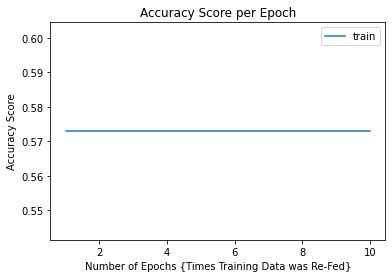

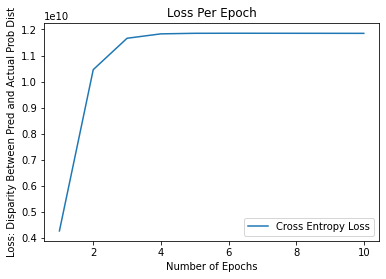

In [141]:
xtrain = xtrain
ytrain = ytrain

hypertune_epoch(xtrain,ytrain)

#### Hypertune Number of Epochs (or iterations, #feeds of training data) NO SPLIT VERSION

In [ ]:
def hypertune_epoch(x,y):
    
    #preprocess 
    scaler = StandardScaler().fit(x)
    x_scaled = scaler.transform(x)
    
    #split
    xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.2)
    
    
    #instantiate an instance of the MLP Classifer @ random parameters
    model = MLPClassifier(
                        hidden_layer_sizes=(20,),
                        max_iter=8,
                        alpha=1e-4,
                        solver="sgd",
                        verbose=10,
                        random_state=1,
                        learning_rate_init=0.5,
                        )
    
    #10 iterations - 10 passes of the entire training set into the model
    epochs = 10
    #List to store performance on train, test, and loss (lower the better)
    train_score = []
    test_score = []
    #diff predicted-actaul probability distributions
    #this is the cross-entropy-loss
    loss = []
    
    
    for i in range(epochs):
        #fit the model on one pass of the training data
        model.partial_fit(xtrain, ytrain,classes=np.unique(ytrain))
        #accuracy in predicting train
        train_score.append(model.score(xtrain,ytrain))
        #accuracy in predicting on test
        test_score.append(model.score(xtest,ytest))
        #difference in predicted and actual probability distribution
        loss.append(model.loss_)
        
    #pick the epoch where accuracy beging to plateu 
    #no more improvement in accuracy when we re-feed the training data another time
    plt.figure(1)
    #on the x points 1-11 (representing the epochs)
    #on the y plot the training accuracy
    plt.plot(np.arange(1,epochs+1), train_score, label = 'train')
    plt.plot(np.arange(1,epochs+1), test_score, label = 'test')
    plt.xlabel('Number of Epochs {Times Training Data was Re-Fed}')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.title('Accuracy Score per Epoch')

    
    #pick the epoch value were loss beging to platue (no more reduction in)
    #loss with an addition pass of training data
    plt.figure(2)
    plt.plot(np.arange(1,epochs+1), loss, label = 'Cross Entropy Loss')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss: Disparity Between Pred and Actual Prob Dist')
    plt.legend()
    plt.title('Loss Per Epoch')
        
    
    

#### NN @ Optimal + CV + Prediction on Unseen Data PRE-SPLIT DATA

In [145]:
def nueral_network(xtrain,ytrain,xtest,ytest, num_epochs):
    
    #preprocessing -- scaling
    scaler = StandardScaler().fit(xtrain)
    xtrain = scaler.transform(xtrain)
    xtest = scaler.transform(xtest)
    
    
    model = MLPClassifier(
        hidden_layer_sizes=(20,),
        max_iter=8,
        alpha=1e-4,
        solver="sgd",
        verbose=10,
        random_state=1,
        learning_rate_init=0.5)
    
    #FIT THE model to the training data
    model.fit(xtrain,ytrain)

    #in the background score calculated the ypred on the training
    #and compares that to the actauly labels on the training
    train_score = ((model.score(xtrain,ytrain))*100).round(2)
    test_score = ((model.score(xtest,ytest))*100).round(2)
    
    
    
    print(f'\n--- DATA EVALUATION ---')
    target_counts = Counter(ytest)
    target_proportions = {class_label: count / len(ytest) for class_label, count in target_counts.items()}
    print(f'Data Distribution Per Target Label (in TEST DATA):\n{target_proportions}')
    
    
    print(f'\n--- MODEL EVALUATION ---')
    #predicting on xtest
    ypred = model.predict(xtest)
    print(f'Training Score: {train_score}%')
    print(f'Testing Score: {test_score}%\n')
    
    #printing out the CM
    plt.figure(1)
    cmap = sns.cubehelix_palette(light= 0.9, as_cmap=True)
    cm = confusion_matrix(ytest, ypred)
    sns.heatmap(cm.T, square = True, annot= True, fmt = 'd', cbar = False, cmap = cmap)
    plt.xlabel('True Label', size=12)
    plt.ylabel('Predicted Label', size=12)
    plt.title('Confusion Matrix')
    print(cm)
    
    #printing out the classification report (already normalized, so)
    #explicitly normalizing it will not change anything!
    ypred = model.predict(xtest)
    print('\n Classification Report\n')
    print(classification_report(ytest,ypred))
    
    
    plt.figure(2)
    cm2 = confusion_matrix(ytest, ypred, normalize='true')
    sns.heatmap(cm2.T, square=True, annot=True, fmt='.2f', cbar=False, cmap=cmap)
    plt.xlabel('True Label', size=12)
    plt.ylabel('Predicted Label', size=12)
    plt.title('Normalized Confusion Matrix')
    print(f'\n{cm2}')
    
    
    #Cv the model
    print('\n--- CV and Instance Prediction ---')
    #add here the ability to predict on unseen data! + CV
    nn_model = MLPClassifier(
        hidden_layer_sizes=(20,),
        max_iter=8,
        alpha=1e-4,
        solver="sgd",
        verbose=10,
        random_state=1,
        learning_rate_init=0.5)
    
    accuracy_scores = cross_val_score(nn_model, xtrain, ytrain, cv=5, scoring='accuracy')
    print("Cross-validation average accuracy (5 folds):", ((np.mean(accuracy_scores))*100).round(2))

    #prediction @ specific point
    nn_model.fit(xtrain,ytrain)
    new_x = [[2.4, 2.5, 3.6, 7.5]]
    scaled_new_x = scaler.transform(new_x)
    new_pred = nn_model.predict(scaled_new_x)
    print("Predictions for new data:", new_pred)
    


    


Iteration 1, loss = 0.24977101
Iteration 2, loss = 0.19255349
Iteration 3, loss = 0.18707010
Iteration 4, loss = 0.18671515
Iteration 5, loss = 0.18590464
Iteration 6, loss = 0.18420045
Iteration 7, loss = 0.18410981
Iteration 8, loss = 0.18459173

--- DATA EVALUATION ---
Data Distribution Per Target Label (in TEST DATA):
{0: 0.42706687730384413, 1: 0.5729331226961558}

--- MODEL EVALUATION ---
Training Score: 93.0%
Testing Score: 93.0%

[[1484  138]
 [ 128 2048]]

 Classification Report

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1622
           1       0.94      0.94      0.94      2176

    accuracy                           0.93      3798
   macro avg       0.93      0.93      0.93      3798
weighted avg       0.93      0.93      0.93      3798


[[0.91491985 0.08508015]
 [0.05882353 0.94117647]]

--- CV and Instance Prediction ---
Iteration 1, loss = 0.26926062
Iteration 2, loss = 0.19534301
Iteration 3, loss = 0.1948826

ValueError: X has 4 features, but StandardScaler is expecting 7 features as input.

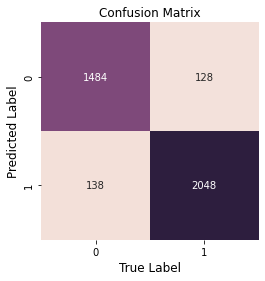

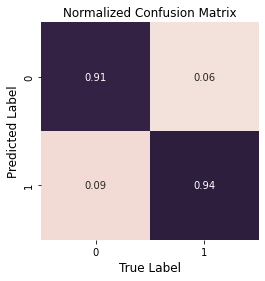

In [146]:
xtrain = xtrain
ytrain = ytrain
xtest = xtest
ytest = ytest
num_epochs = 4

nueral_network(xtrain,ytrain,xtest,ytest, num_epochs)

#### NN @ Optimal + CV + Prediction on Unseen Data (NO SPLIT DATA)

In [131]:
def nueral_network(x,y, num_epochs):
    
    #preprocessing -- scaling
    scaler = StandardScaler().fit(x)
    x_scaled = scaler.transform(x)
    
    
    #splitting
    xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.2)
    
    model = MLPClassifier(
        hidden_layer_sizes=(20,),
        max_iter=8,
        alpha=1e-4,
        solver="sgd",
        verbose=10,
        random_state=1,
        learning_rate_init=0.5)
    
    #FIT THE model to the training data
    model.fit(xtrain,ytrain)

    #in the background score calculated the ypred on the training
    #and compares that to the actauly labels on the training
    train_score = ((model.score(xtrain,ytrain))*100).round(2)
    test_score = ((model.score(xtest,ytest))*100).round(2)
    
    
    
    print(f'\n--- DATA EVALUATION ---')
    target_counts = Counter(y)
    target_proportions = {class_label: count / len(y) for class_label, count in target_counts.items()}
    print(f'Data Distribution Per Target Label:\n{target_proportions}')
    
    
    print(f'\n--- MODEL EVALUATION ---')
    #predicting on xtest
    ypred = model.predict(xtest)
    print(f'Training Score: {train_score}%')
    print(f'Testing Score: {test_score}%\n')
    
    #printing out the CM
    plt.figure(1)
    cmap = sns.cubehelix_palette(light= 0.9, as_cmap=True)
    cm = confusion_matrix(ytest, ypred)
    sns.heatmap(cm.T, square = True, annot= True, fmt = 'd', cbar = False, cmap = cmap)
    plt.xlabel('True Label', size=12)
    plt.ylabel('Predicted Label', size=12)
    plt.title('Confusion Matrix')
    print(cm)
    
    #printing out the classification report (already normalized, so)
    #explicitly normalizing it will not change anything!
    ypred = model.predict(xtest)
    print('\n Classification Report\n')
    print(classification_report(ytest,ypred))
    
    
    plt.figure(2)
    cm2 = confusion_matrix(ytest, ypred, normalize='true')
    sns.heatmap(cm2.T, square=True, annot=True, fmt='.2f', cbar=False, cmap=cmap)
    plt.xlabel('True Label', size=12)
    plt.ylabel('Predicted Label', size=12)
    plt.title('Normalized Confusion Matrix')
    print(f'\n{cm2}')
    
    
    #Cv the model
    print('\n--- CV and Instance Prediction ---')
    #add here the ability to predict on unseen data! + CV
    nn_model = MLPClassifier(
        hidden_layer_sizes=(20,),
        max_iter=8,
        alpha=1e-4,
        solver="sgd",
        verbose=10,
        random_state=1,
        learning_rate_init=0.5)
    
    accuracy_scores = cross_val_score(nn_model, x, y, cv=5, scoring='accuracy')
    print("Cross-validation average accuracy (5 folds):", ((np.mean(accuracy_scores))*100).round(2))

    #prediction @ specific point
    nn_model.fit(x,y)
    new_x = [[2.4, 2.5, 3.6, 7.5]]
    scaled_new_x = scaler.transform(new_x)
    new_pred = nn_model.predict(scaled_new_x)
    print("Predictions for new data:", new_pred)
    


    


In [132]:
x2 = x2
y2 = y2


nn_reg(x2,y2)

NameError: name 'x2' is not defined

# Ensemble

In [136]:
from sklearn.metrics import log_loss

def class_ensemble(xtrain, ytrain, xtest, ytest):
    
    # Preprocess the data (scale features)
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    xtest = scaler.transform(xtest)
    
    # Initialize N classifiers 
    model1 = LogisticRegression()
    model2 = LogisticRegression()
    model3 = LogisticRegression()
    
    # Train the individual classifiers
    model1.fit(xtrain, ytrain)
    model2.fit(xtrain, ytrain)
    model3.fit(xtrain, ytrain)
    
    # Predict the classes on test using each classifier
    pred1 = model1.predict(xtest)
    pred2 = model2.predict(xtest)
    pred3 = model3.predict(xtest)
    
    # Evaluate the predictive performance each model using accuracy
    acc_1 = accuracy_score(ytest, pred1)
    acc_2 = accuracy_score(ytest, pred2)
    acc_3 = accuracy_score(ytest, pred3)
    
    
    # Examining the loss for each model (aggregate error in prediction)
    print('--- MODEL EVALAUTION: Log Loss ---')
    print(f'Model 1 Log Loss: {log_loss(ytest, pred1)}')
    print(f'Model 2 Log Loss: {log_loss(ytest, pred2)}')
    print(f'Model 3 Log Loss: {log_loss(ytest, pred3)}')
    
    
    print('\n--- MODEL EVALAUTION: Accuracy ---')
    print(f'Accuracy (model 1): {acc_1}')
    print(f'Accuracy (model 2): {acc_2}')
    print(f'Accuracy (model 3): {acc_3}')
    
    print('\n--- APPLYING THE MAJORITY VOTE ENSEMBLE ---')
    ensemble_pred = np.array([pred1, pred2, pred3]).mean(axis=0)
    ensemble_pred = np.where(ensemble_pred >= 0.5, 1, 0)  # Convert probabilities to binary labels
    acc_ensemble = accuracy_score(ytest, ensemble_pred)
    print(f'Accuracy (Ensemble): {acc_ensemble}')

In [137]:
xtrain=xtrain
ytrain=ytrain
xtest =xtest
ytest=ytest

class_ensemble(xtrain, ytrain, xtest, ytest)

--- MODEL EVALAUTION: Log Loss ---
Model 1 Log Loss: 2.5623450276623565
Model 2 Log Loss: 2.5623450276623565
Model 3 Log Loss: 2.5623450276623565

--- MODEL EVALAUTION: Accuracy ---
Accuracy (model 1): 0.9289099526066351
Accuracy (model 2): 0.9289099526066351
Accuracy (model 3): 0.9289099526066351

--- APPLYING THE MAJORITY VOTE ENSEMBLE ---
Accuracy (Ensemble): 0.9289099526066351
